In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

In [5]:
names ={
'state_TE':  'state_TE',
'protein_emb_vevo':  'protein_emb_vevo',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-evo2_proj':  'mlp-mixed-evo2_proj',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-esmc_proj':  'mlp-mixed-esmc_proj',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-mlp_hidden':  'mlp-mixed-mlp_hidden',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-gene_encoder_out':  'mlp-mixed-gene_encoder_out',
'esmc-evo2-concat-no-mlp-no-norm-no-scale-TE':  'no-mlp-TE',
'esmc-evo2-concat-no-mlp-no-norm-no-scale-gene_encoder_out':  'no-mlp-gene_encoder_out',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-TE':  'mlp-mixed-TE',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-esm_prim_add':  'mlp-mixed-esm_primary_addition',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-esm_prim_concat':  'mlp-mixed-esm_primary_concat',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-esm_prim_norm_concat':  'mlp-mixed-esm_primary_norm_concat',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-esm_prim_pca_concat':  'mlp-mixed-esm_primary_pca_concat',
'esmc-evo2-concat-mlp-mixed-no-norm-no-scale-primary':  'mlp-mixed-primary',
'mosaicfm-70m-VQ9aRB_GE': 'mosaicfm-70m-VQ9aRB_GE',
'mosaicfm-70m-VQ9aRB_TE': 'mosaicfm-70m-VQ9aRB_TE',
'mosaicfm-70m-final-wo-gene-cont-train-gene-concat-esm_GE':'continue-train-70M-new-gene-enc-GE',
'mosaicfm-70m-final-wo-gene-cont-train-gene-concat-esm_TE': 'continue-train-70M-new-gene-enc-TE',
'mosaicfm-70m-final-wo-gene-embed-cont-train2048-filtered-logpred_GE': 'continue-train-70M-old-gene-enc-log-pred-GE',
'mosaicfm-70m-final-wo-gene-embed-cont-train2048-filtered-logpred_TE': 'continue-train-70M-old-gene-enc-log-pred-TE',
'mosaicfm-70m-final-wo-gene-embed-cont-train2048-filtered_GE': 'continue-train-70M-old-gene-enc-GE',
'mosaicfm-70m-final-wo-gene-embed-cont-train2048-filtered_TE': 'continue-train-70M-old-gene-enc-TE'

}


Loading data from v14/rep_2/auprc.csv
Loading data from v14/rep_3/auprc.csv
Loading data from v14/rep_1/auprc.csv


/tmp/ipykernel_1064259/4067944269.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=filtered_data, x='emb', y='AUPRC', errorbar="sd", estimator=np.mean, palette=palette)
/tmp/ipykernel_1064259/4067944269.py:36: UserWarning: The palette list has more values (27) than needed (9), which may not be intended.
  ax = sns.barplot(data=filtered_data, x='emb', y='AUPRC', errorbar="sd", estimator=np.mean, palette=palette)
/tmp/ipykernel_1064259/4067944269.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x tick labels


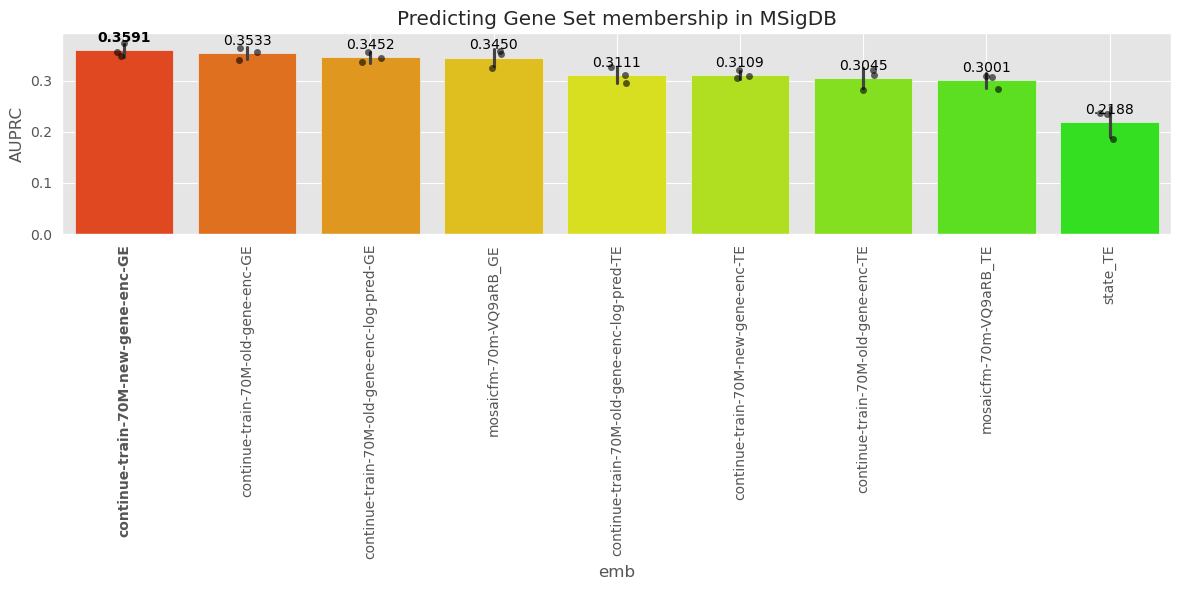

In [ ]:
# Use glob to find all csv files in directories named "rep_x"
file_paths = glob.glob("v14/rep_*/auprc.csv")

# Load data from the files found by glob
all_data = []
for file_path in file_paths:
    print(f"Loading data from {file_path}")
    rep_data = pd.read_csv(file_path)
    # Extract the replicate number from the file path
    rep_number = file_path.split('/')[1].split('_')[1]
    rep_data['Replicate'] = f'Rep {rep_number}'
    all_data.append(rep_data)

# Combine all replicates into a single DataFrame
combined = pd.concat(all_data)

# Filter out embeddings that end with 'GE'
# filtered_data = combined[~combined['emb'].str.endswith('GE')]
filtered_data = combined
# Calculate mean AUPRC for each embedding and sort by it
mean_auprc = filtered_data.groupby('emb')['AUPRC'].mean().sort_values(ascending=False)
filtered_data = filtered_data.set_index('emb').loc[mean_auprc.index].reset_index()

# Define a color palette for the bar plot
n_bars = filtered_data['emb'].shape[0]
filtered_data['emb'] = filtered_data['emb'].replace(names)


palette = sns.color_palette("hsv", n_bars)


sns.set_style("whitegrid")
plt.style.use('ggplot')
# Create the bar plot with seaborn for the mean AUPRC
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=filtered_data, x='emb', y='AUPRC', errorbar="sd", estimator=np.mean, palette=palette)

# Overlay individual AUPRCs with strip plot
sns.stripplot(data=filtered_data, x='emb', y='AUPRC', color='black', size=5, jitter=True, alpha=0.6)

# Adding the text labels on the bars
for index, value in enumerate(mean_auprc):
    if index == 0:
        ax.text(index, value+0.01, f"{value:.4f}", color='black', ha="center", va="bottom",
           fontweight="bold"
               )
    else:
        ax.text(index, value+0.01, f"{value:.4f}", color='black', ha="center", va="bottom",
               )

# Set tick labels with the first label bold
tick_labels = ax.get_xticklabels()  # Get all the tick labels
tick_labels[0].set_fontweight('bold')  # Set the first tick label to bold

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x tick labels
ax.set_title('Predicting Gene Set membership in MSigDB - Hallmarks')  # Optional: add a title to the plot
ax.grid(True)  # Enable grid
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.savefig("auprc_with_reps.png", dpi=300, bbox_inches="tight")
plt.show()  # Show the plot
